# 데이터 탐색 과정

## 분석용 Library import 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



## 데이터 세트 로딩
### "data/bank_churner.csv"를 판다스 데이터프레임으로 로딩(pd.read_csv)

In [5]:
bank_churner_df = pd.read_csv("./data/bank_churner.csv")
bank_churner_df.head(5)

,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3,3544.0,NaN,1883.0,0.831,NaN,111.0,0.734,0.469
1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,45,...,1,3,3421.0,2517.0,904.0,0.992,992.0,21.0,0.400,NaN
2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,3,8258.0,1771.0,6487.0,NaN,1447.0,23.0,0.000,0.214
3,708085458,0,34,F,2,Uneducated,Single,Less than $40K,Blue,24,...,2,2,1438.3,0.0,1438.3,0.827,3940.0,82.0,0.952,0.000
4,708086958,0,49,F,2,Uneducated,Married,Unknown,Blue,41,...,5,2,3128.0,749.0,2379.0,0.598,NaN,NaN,NaN,0.239


## 데이터 세트 정보 확인
- 일부 Feature에 Null 값 존재함을 확인 함
- 향후 모델학습시 Null 값 처리에 대한 필요성 확인 함
- 모델학습을 의해 Oject 항목을 적절하게 변형할 필요성을 확인 함 - sex, education, marital_stat, imcome_cat, card_type (5개 Features) 

In [4]:
bank_churner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cstno                  8101 non-null   int64  
 1   is_churned             8101 non-null   int64  
 2   age                    8101 non-null   int64  
 3   sex                    7293 non-null   object 
 4   dependent_num          8101 non-null   int64  
 5   education              8101 non-null   object 
 6   marital_stat           8101 non-null   object 
 7   imcome_cat             6482 non-null   object 
 8   card_type              8101 non-null   object 
 9   mon_on_book            8101 non-null   int64  
 10  tot_product_count      8101 non-null   int64  
 11  months_inact_for_12m   8101 non-null   int64  
 12  contact_cnt_for_12m    8101 non-null   int64  
 13  credit_line            8101 non-null   float64
 14  tot_revol_balance      6580 non-null   float64
 15  mean

## 수치 데이터의 분포값 개략 확인

In [6]:
bank_churner_df.describe()

,cstno,is_churned,age,dependent_num,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
count,8.101000e+03,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,6580.000000,8101.000000,5666.000000,6432.000000,4851.000000,6472.000000,5575.000000
mean,7.391329e+08,0.160474,46.306382,2.334773,35.923590,3.813233,2.346871,2.450315,8636.548068,1158.693313,7476.165276,0.761457,4438.785448,64.568336,0.709951,0.274055
std,3.691912e+07,0.367068,8.022527,1.289564,8.024359,1.551838,1.014177,1.100687,9086.419557,814.653118,9080.279910,0.217645,3451.913558,23.659213,0.234484,0.275833
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,11.000000,0.000000,0.000000
25%,7.130534e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,324.750000,1341.000000,0.631000,2152.750000,44.500000,0.581000,0.023000
50%,7.178860e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1272.000000,3495.000000,0.739000,3905.000000,67.000000,0.700000,0.175000
75%,7.728464e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11128.000000,1777.250000,9942.000000,0.862000,4754.250000,80.000000,0.818000,0.501000
max,8.283431e+08,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.594000,18484.000000,139.000000,3.571000,0.999000


## Feature별 특징 확인

### is_churned : 이탈  여부
- 1 : 이탈, 0 : 유지

In [13]:
bank_churner_df["is_churned"].value_counts()

0    6801
1    1300
Name: is_churned, dtype: int64

<Axes: xlabel='is_churned', ylabel='count'>

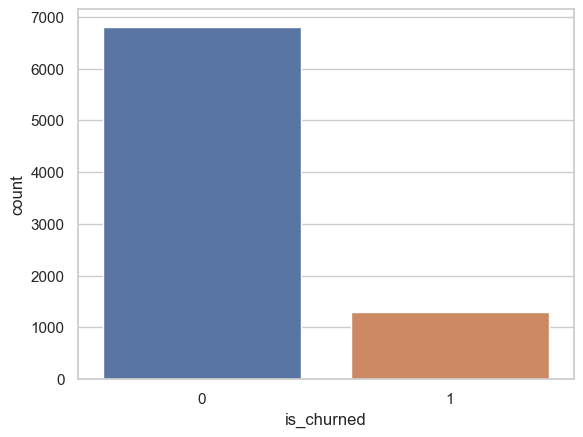

In [15]:
sns.set_theme(style="whitegrid")
sns.countplot(x='is_churned', data=bank_churner_df)

### age : 나이

In [28]:
bank_churner_df["age"].describe()

count    8101.000000
mean       46.306382
std         8.022527
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        70.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='count'>

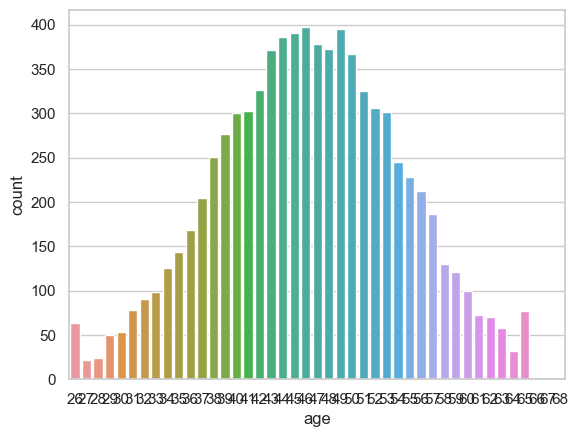

In [56]:
age_df = bank_churner_df[(bank_churner_df['age'] > 20) & (bank_churner_df['age'] < 70)][['age']]
age_df
sns.countplot(x='age', data=age_df)

In [30]:
# 나이를 나이대별로 범주화
def age_categorize(age):
    age = (age // 10) * 10
    return age

bank_churner_df['age_category'] = bank_churner_df.age.apply(age_categorize)
bank_churner_df['age_category']
    

0       40
1       50
2       40
3       30
4       40
        ..
8096    40
8097    50
8098    40
8099    50
8100    40
Name: age_category, Length: 8101, dtype: int64

<Axes: xlabel='age_category', ylabel='count'>

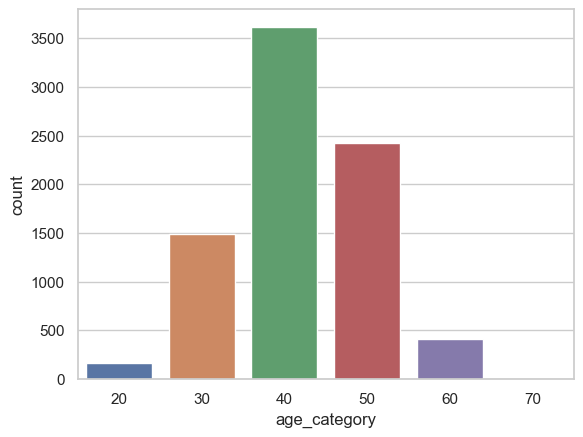

In [39]:
sns.countplot(x='age_category', data=bank_churner_df)

<Axes: xlabel='age_category', ylabel='count'>

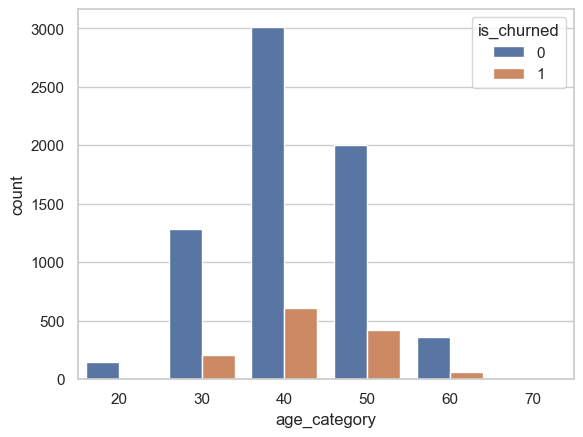

In [40]:
sns.countplot(x='age_category', data=bank_churner_df, hue='is_churned')

### sex : 성별